## A Comparison Notebook For Different Clustering Algorithms

In [119]:
import warnings
from sklearn.datasets import make_blobs, make_circles, make_moons
import numpy as np 
warnings.filterwarnings("ignore")
X_blobs, y_blobs = make_blobs(n_samples=500, n_features=3, centers=5, random_state=123) # 3D blobs
X_circles, y_circles = make_circles(n_samples=500, random_state=123, noise=.02)
X_moons, y_moons = make_moons(n_samples=500, random_state=123, noise=.1)

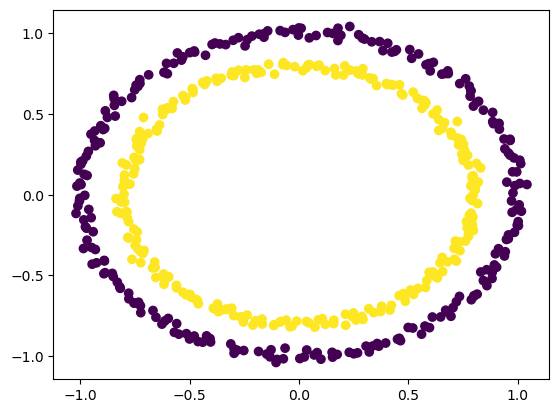

In [120]:
import matplotlib.pyplot as plt

plt.scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
plt.show()

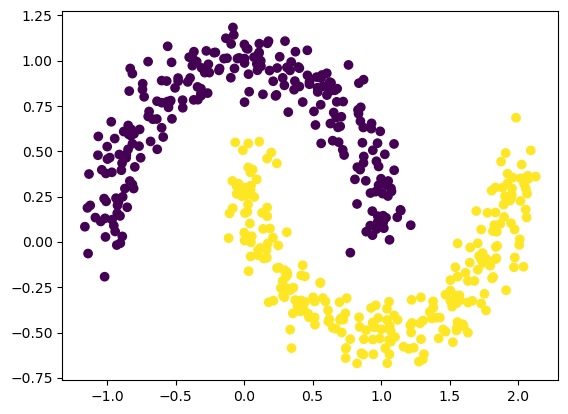

In [121]:
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
plt.show()

## KMeans

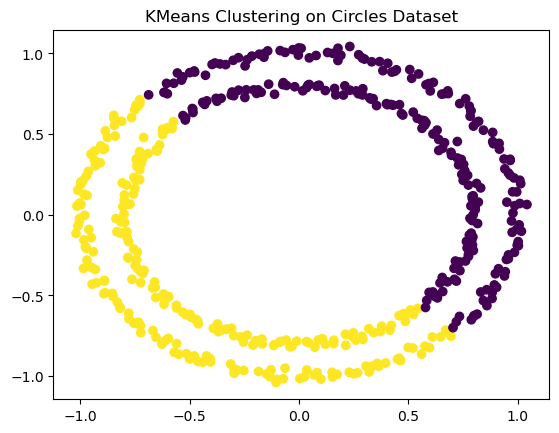

In [122]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=123, n_init=20)
yPred = kmeans.fit_predict(X_circles)

plt.scatter(X_circles[:,0], X_circles[:,1], c=yPred)
plt.title("KMeans Clustering on Circles Dataset")
plt.show()

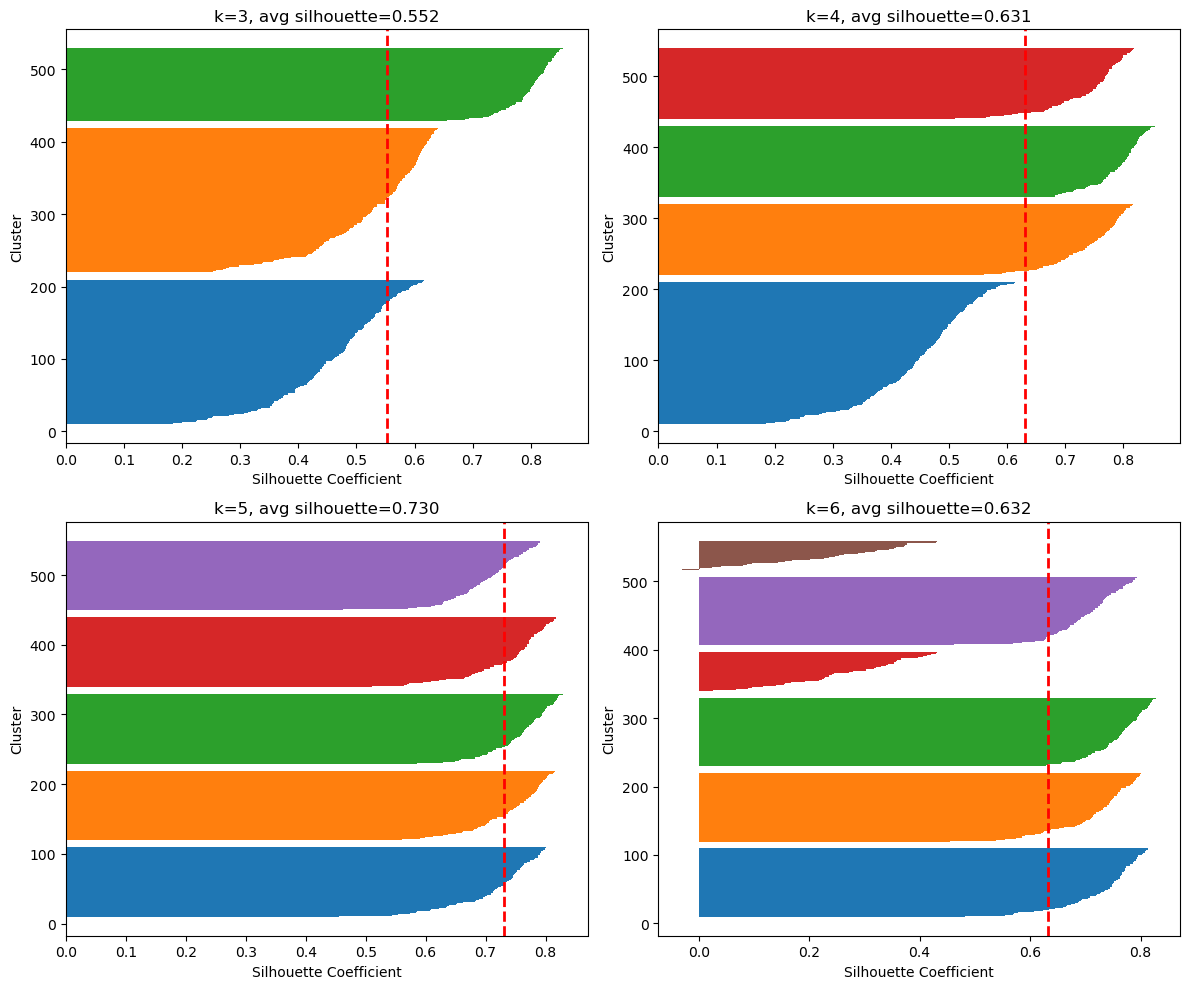

In [123]:
from sklearn.metrics import silhouette_samples, silhouette_score

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

cluster_range = [3, 4, 5, 6]

for idx, n_clusters in enumerate(cluster_range):
    ax = axes[idx]
    kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=10)
    yPred = kmeans.fit_predict(X_blobs)
    silhouette_vals = silhouette_samples(X_blobs, yPred)
    silhouette_avg = silhouette_score(X_blobs, yPred)
    
    y_lower = 10
    
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[yPred == i]
        cluster_silhouette_vals.sort()
        
        y_upper = y_lower + len(cluster_silhouette_vals)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        y_lower = y_upper + 10
    
    ax.axvline(silhouette_avg, color='red', linestyle='--', linewidth=2)
    ax.set_title(f'k={n_clusters}, avg silhouette={silhouette_avg:.3f}')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')

plt.tight_layout()
plt.show()

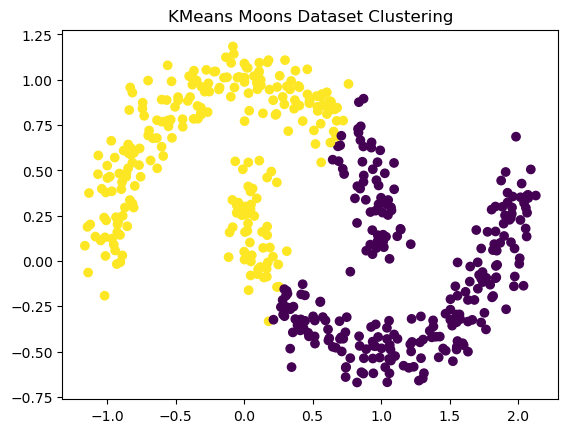

In [124]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=123, n_init=20)
yPred = kmeans.fit_predict(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=yPred)
plt.title("KMeans Moons Dataset Clustering")
plt.show()

KMeans isn't very good at the non-standard clustering of rings and arches. It does, however, do very well at the 3D Blobs. (which are harder to visualize)

The idea behind KMeans is to find circular clusters, so these struggles make sense.

## DBSCAN

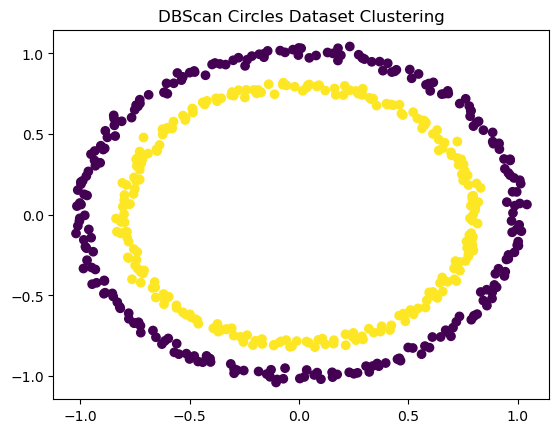

In [125]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.1, min_samples=5)
yPred = dbscan.fit_predict(X_circles)

plt.scatter(X_circles[:,0], X_circles[:,1], c=yPred)
plt.title("DBScan Circles Dataset Clustering")
plt.show()

# Note: you have to fiddle with the hyperparameters

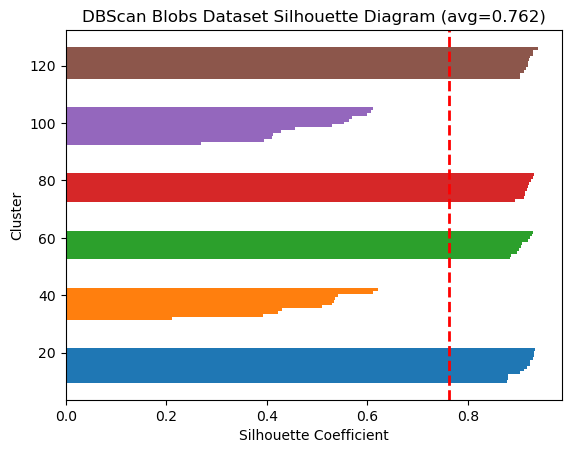

In [153]:
dbscan = DBSCAN(eps=.7, min_samples=10)
yPred = dbscan.fit_predict(X_blobs)

mask = yPred != -1
X_clustered = X_blobs[mask]
labels_clustered = yPred[mask]

silhouette_vals = silhouette_samples(X_clustered, labels_clustered)
silhouette_avg = silhouette_score(X_clustered, labels_clustered)

n_clusters = len(np.unique(labels_clustered))
y_lower = 10

for i in np.unique(labels_clustered):
    cluster_silhouette_vals = silhouette_vals[labels_clustered == i]
    cluster_silhouette_vals.sort()
    
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
    y_lower = y_upper + 10

plt.axvline(silhouette_avg, color='red', linestyle='--', linewidth=2)
plt.title(f"DBScan Blobs Dataset Silhouette Diagram (avg={silhouette_avg:.3f})")
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()

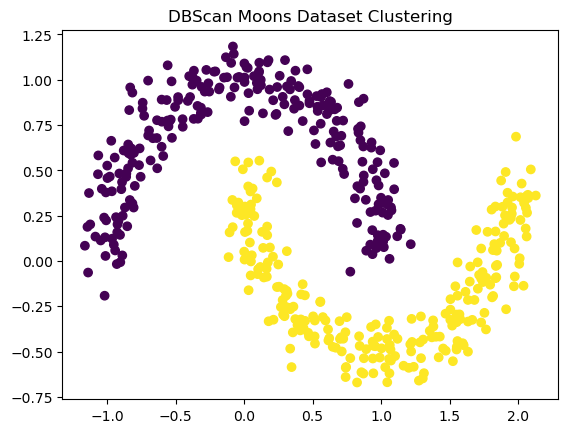

In [142]:
dbscan = DBSCAN(eps=.22, min_samples=5)
yPred = dbscan.fit_predict(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=yPred)
plt.title("DBScan Moons Dataset Clustering")
plt.show()

# Once again you have to fiddle with the hyperparams to get the best clustering

DBSCAN does much better with the non-circular data, but cant quite figure out 3D blobs even when manually tuning the hyperparameters.

## Gaussian Mixtures

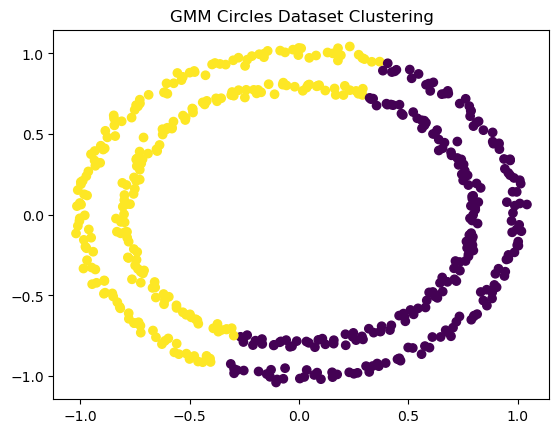

In [159]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, n_init=10)
yPred = gm.fit_predict(X_circles)

plt.scatter(X_circles[:,0], X_circles[:,1], c=yPred)
plt.title("GMM Circles Dataset Clustering")
plt.show()

Using a GMM for this dataset is a little silly because GMMs assume underlying normality. Rings are not generated from a gaussian distribution.

In [168]:
for clusterCount in [2,3,4,5,6,7,8]:
    gm = GaussianMixture(n_components=clusterCount, n_init=10)
    yPred = gm.fit_predict(X_blobs)
    print(clusterCount, gm.aic(X_blobs), gm.bic(X_blobs))
# Looks like clusters=5 is the best, which is what we generated from

2 7145.62405618457 7225.701610054592
3 6466.85626772013 6589.079902574374
4 6150.127008818923 6314.496724657389
5 5863.058858372087 6069.574655194775
6 5869.44993407573 6118.11181188264
7 5872.941373628982 6163.749332420113
8 5868.906328222368 6201.860367997721
